# 03: Load the combined dataframe, and do some plotting 

Weil ich es sonst nicht verstehe mit den P-Vales:

The p-value is the probability of observing a non-zero correlation coefficient in our sample data when in fact the null hypothesis is true. A low p-value would lead you to reject the null hypothesis (the null hypothesis is typically that the observed relationship between the variables is the result of pure chance (i.e. the correlation coefficient is really zero — there is no linear relationship)).

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats

# Read in the data
df = pd.read_csv("processed_data/sales_and_weather_2021-2022.csv")
df_cold = pd.read_csv("processed_data/sales_and_weather_2021-2022_ONLY_COLD.csv")
df_warm = pd.read_csv("processed_data/sales_and_weather_2021-2022_ONLY_WARM.csv")
# Drop the null values from the variables
df = df.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df_cold = df_cold.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df_warm = df_warm.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df


,date,day_of_week,month,year,week_of_year,Getränke_sales,Coffee_sales,Cappuccino_sales,Flat White_sales,Cappuccino groß_sales,...,precipitation,temperature_mean,temperature_max,temperature_min,sunshine_duration,cloud_cover,wind_speed,humidity,pressure,snow_depth
0,2021-01-02,Saturday,January,2021,53,692.9,596.4,230.4,98.8,72.2,...,8.0,0.0,10.0,-16.0,0.0,8.0,22.0,89.0,10127.0,0.0
1,2021-01-04,Monday,January,2021,1,429.2,371.9,192.0,38.0,30.4,...,0.0,0.0,9.0,-9.0,0.0,8.0,21.0,89.0,10134.0,0.0
2,2021-01-05,Tuesday,January,2021,1,392.8,378.0,144.0,41.8,22.8,...,10.0,5.0,11.0,-4.0,0.0,8.0,22.0,92.0,10125.0,0.0
3,2021-01-07,Thursday,January,2021,1,493.2,414.2,179.2,34.2,53.2,...,1.0,3.0,13.0,-10.0,0.0,8.0,15.0,89.0,10153.0,3.0
4,2021-01-08,Friday,January,2021,1,557.5,483.5,185.6,102.6,72.2,...,0.0,0.0,11.0,-19.0,1.0,7.0,20.0,84.0,10163.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2022-09-26,Monday,September,2022,39,882.0,799.4,190.4,57.0,58.8,...,33.0,113.0,159.0,67.0,36.0,NaN,28.0,78.0,10082.0,NaN
606,2022-09-27,Tuesday,September,2022,39,817.1,742.0,136.0,68.4,54.6,...,59.0,94.0,125.0,68.0,27.0,NaN,43.0,81.0,10012.0,NaN
607,2022-09-28,Wednesday,September,2022,39,847.2,778.6,142.8,68.4,58.8,...,10.0,93.0,120.0,56.0,4.0,NaN,26.0,83.0,9995.0,NaN
608,2022-09-29,Thursday,September,2022,39,954.0,882.9,163.2,68.4,79.8,...,0.0,90.0,135.0,44.0,11.0,NaN,10.0,81.0,10030.0,NaN


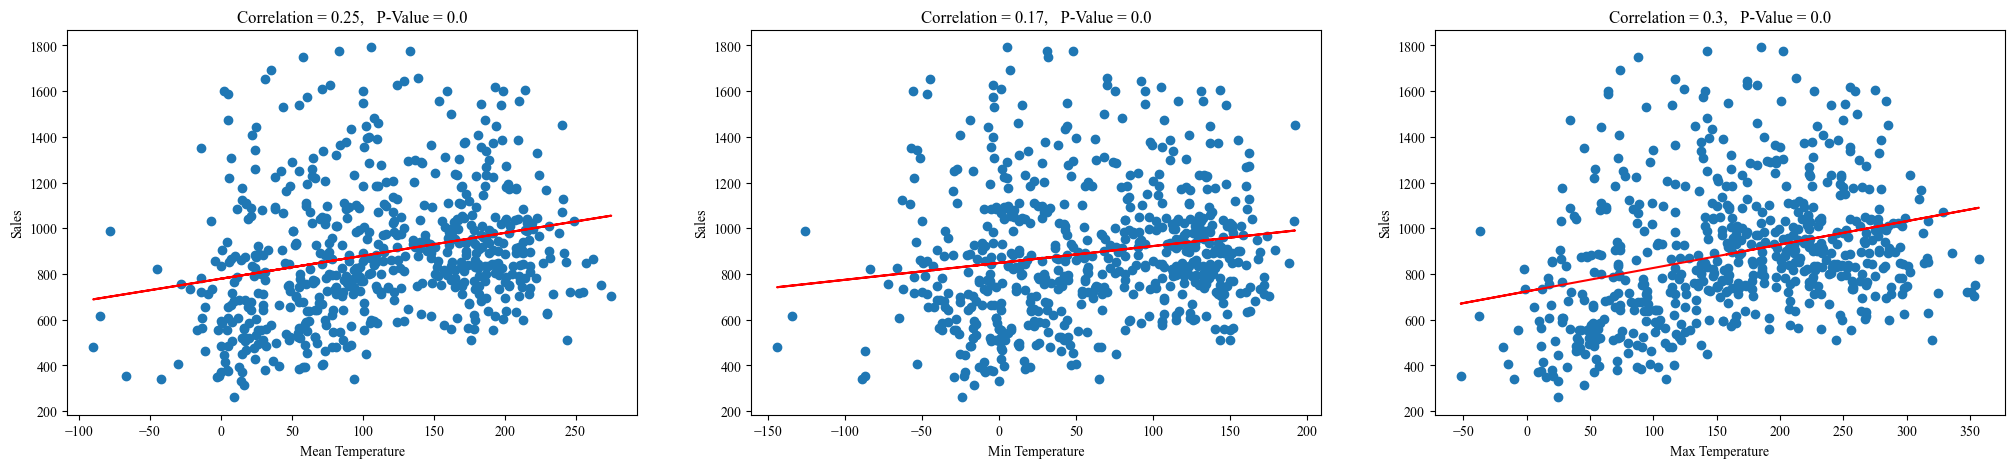

In [57]:
sales_variable = "Coffee_sales"

# plot the correlation between sales and mean, min and max temperature
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

axes[0].scatter(df["temperature_mean"], df[sales_variable])
axes[0].set_xlabel("Mean Temperature")
axes[0].set_ylabel("Sales")
# fit a linear regression line with sklearn to plot the line in the plot
from sklearn.linear_model import LinearRegression
X = df["temperature_mean"].values.reshape(-1, 1)
y = df[sales_variable].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[0].plot(X, reg.predict(X), color="red")
# corr = df[sales_variable].corr(df["temperature_mean"]) # inbuilt function to calculate correlation???
corr = scipy.stats.pearsonr(df[sales_variable], df["temperature_mean"])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df["temperature_mean"])[1]
axes[0].set_title(f"Correlation = {corr.round(2)}" + f",   P-Value = {pval.round(2)}")


axes[1].scatter(df["temperature_min"], df[sales_variable])
axes[1].set_xlabel("Min Temperature")
axes[1].set_ylabel("Sales")
X = df["temperature_min"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[1].plot(X, reg.predict(X), color="red")
#corr = df[sales_variable].corr(df["temperature_min"])
corr = scipy.stats.pearsonr(df[sales_variable], df["temperature_min"])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df["temperature_min"])[1]
axes[1].set_title(f"Correlation = {corr.round(2)}" + f",   P-Value = {pval.round(2)}")


axes[2].scatter(df["temperature_max"], df[sales_variable])
axes[2].set_xlabel("Max Temperature")
axes[2].set_ylabel("Sales")
X = df["temperature_max"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[2].plot(X, reg.predict(X), color="red")
#corr = df[sales_variable].corr(df["temperature_max"])
corr = scipy.stats.pearsonr(df[sales_variable], df["temperature_max"])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df["temperature_max"])[1]
axes[2].set_title(f"Correlation = {corr.round(2)}" + f",   P-Value = {pval.round(2)}")

plt.show()



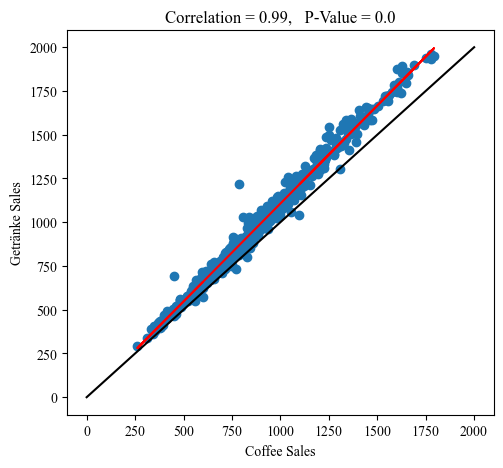

In [17]:
# plot the correlation between Coffee_sales and Getränke_sales
fig, ax = plt.subplots(1, 1, figsize=(5.5,5))

ax.scatter(df["Coffee_sales"], df["Getränke_sales"])
ax.set_xlabel("Coffee Sales")
ax.set_ylabel("Getränke Sales")
X = df["Coffee_sales"].values.reshape(-1, 1)
y = df["Getränke_sales"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax.plot(X, reg.predict(X), color="red")
x_ix_y = np.linspace(0, 2000, 2000)
ax.plot(x_ix_y, x_ix_y, color="black")
#corr = df["Coffee_sales"].corr(df["Getränke_sales"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["Getränke_sales"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["Getränke_sales"])[1]
ax.set_title(f"Correlation = {corr.round(2)}" + f",   P-Value = {pval}")
plt.show()

In [58]:
def plot_correlation(df, weather_variable, sales_variable, condition, condition_value, ax, color=None):
    df= df[df[condition] == condition_value]
    ax.scatter(df[weather_variable] / 10, df[sales_variable], color=color, s=10)
    X = df[weather_variable].values.reshape(-1, 1) / 10
    y = df[sales_variable].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    ax.plot(X, reg.predict(X), color="black")
    corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable])[0]
    pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable])[1]
    ax.set_title(f"{condition_value}, Corr={corr.round(2)}, PVal={pval.round(3)}", fontsize=10)

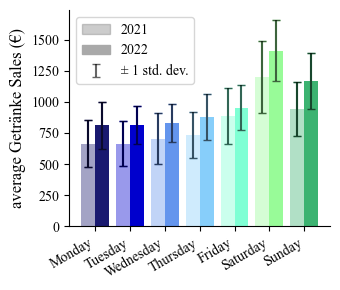

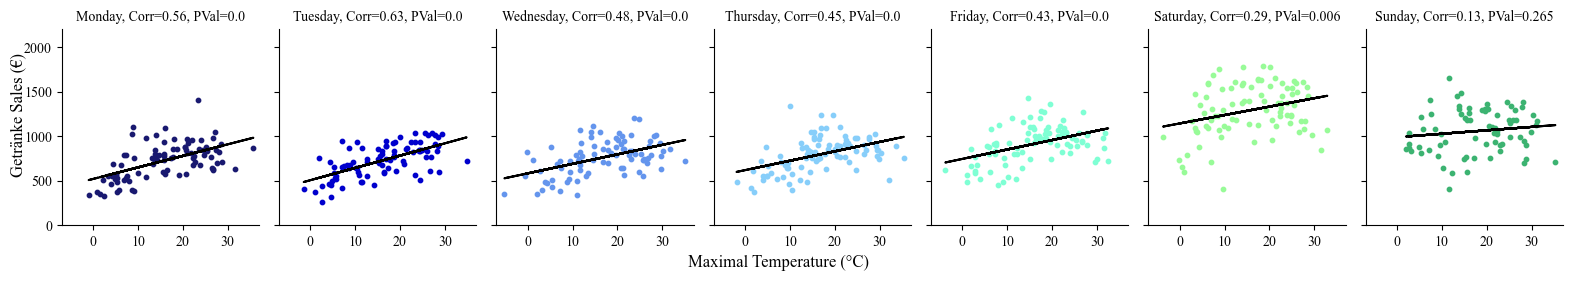

In [59]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_colors = ["midnightblue", "mediumblue", "cornflowerblue", "lightskyblue", "aquamarine", "palegreen", "mediumseagreen"]

# change the font for the whole plot
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3), sharey=True, sharex=True)
ax.set_ylabel("average Getränke Sales (€)", fontsize=12, x=-0.0, y=0.5)

width = 0.4
for i, day in enumerate(days):
    ax.bar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width, alpha=0.4, )
    ax.bar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width)
    # add the standard deviation as error bars
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6, label = "2021")
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6)
    #ax[int(year) - 2021].set_ylim(0, 1600)
    # turn the x-axis labels 45 degrees
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        tick.set_horizontalalignment("right")
    # use the day names as x-axis labels
    ax.set_xticks(np.arange(1, 8))
    ax.set_xticklabels(days)
    
t = ["2021", "2022", "± 1 std. dev."]
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles[:3], t)
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('darkgrey')
# remove the right and top border of the fig
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("results/mean_sales_by_day_of_week.pdf", dpi=300, format="pdf")
plt.show()



# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels
plt.tight_layout()
plt.savefig("results/correlation_by_day_of_week.pdf", dpi=300, format="pdf")
plt.show()







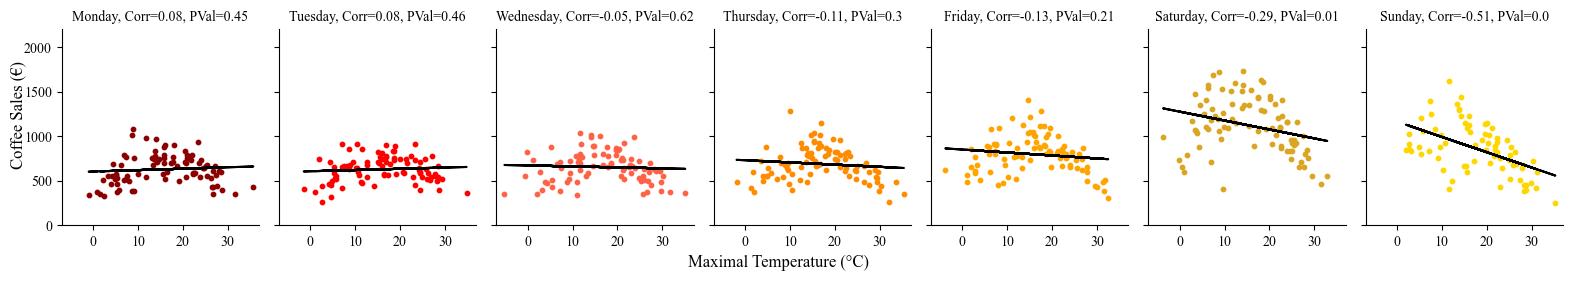

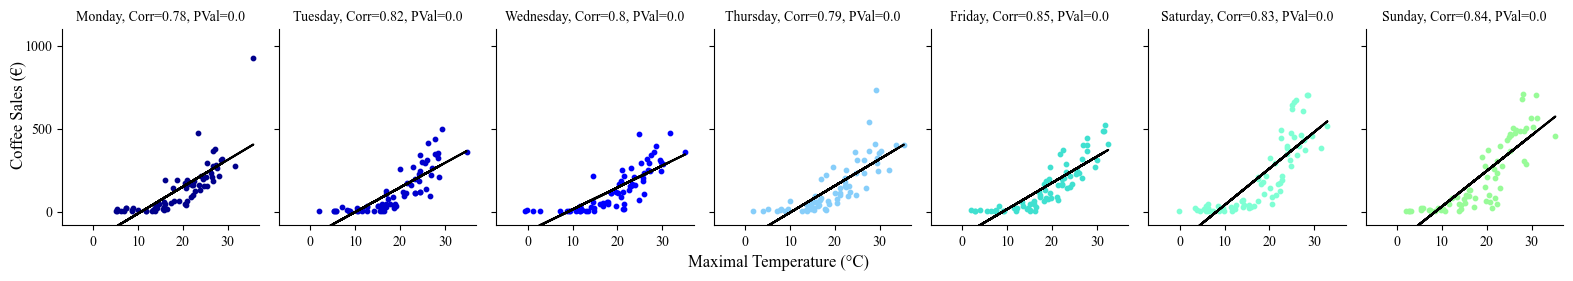

In [44]:
day_colors_warm = ["darkred", "red", "tomato", "darkorange", "orange", "goldenrod", "gold",  ]
day_colors_cold = ["darkblue", "mediumblue", "blue", "lightskyblue", "turquoise", "aquamarine", "palegreen", ]

sales_variable = "Coffee_sales"
weather_variable = "temperature_max"

# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df_warm, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors_warm[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df_cold, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors_cold[i])
    axes[i].set_ylim(-80, 1100)
    axes[i].set_yticks(np.arange(0, 1100, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()


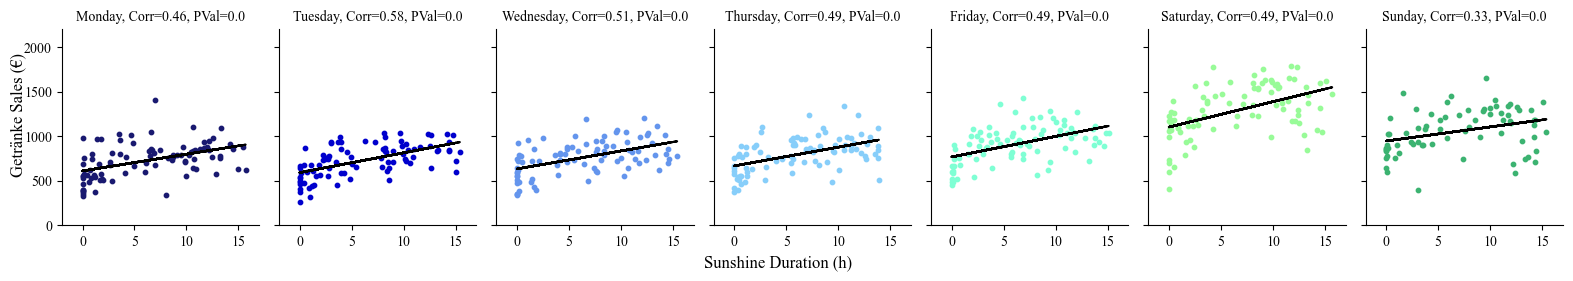

In [8]:
weather_variable = "sunshine_duration"

sales_variable = "Coffee_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Sunshine Duration (h)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-2, 17)
    axes[i].set_xticks(np.arange(0, 20, 5))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

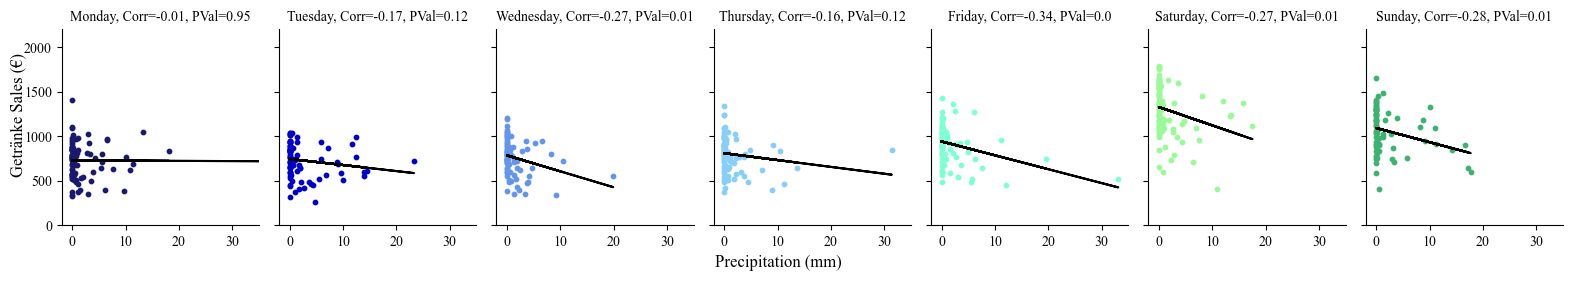

In [9]:
weather_variable = "precipitation"

sales_variable = "Coffee_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Precipitation (mm)", fontsize=12, x=0.5, y=0.08)
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-2, 35)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

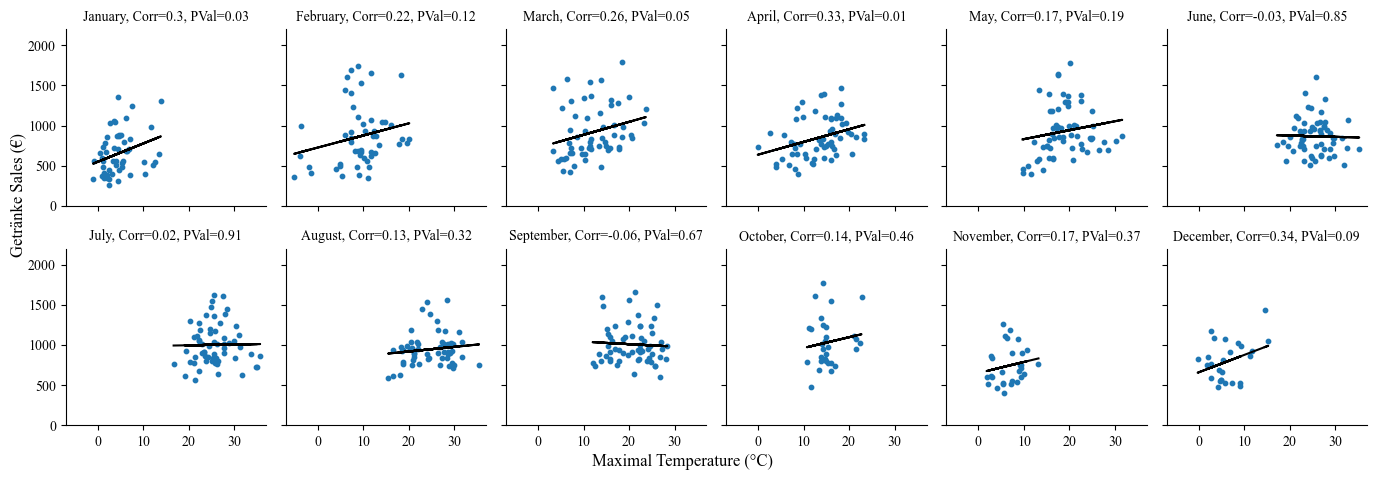

In [10]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(14, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-7, 37)
    axes[j,i].set_xticks(np.arange(0, 40, 10))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()



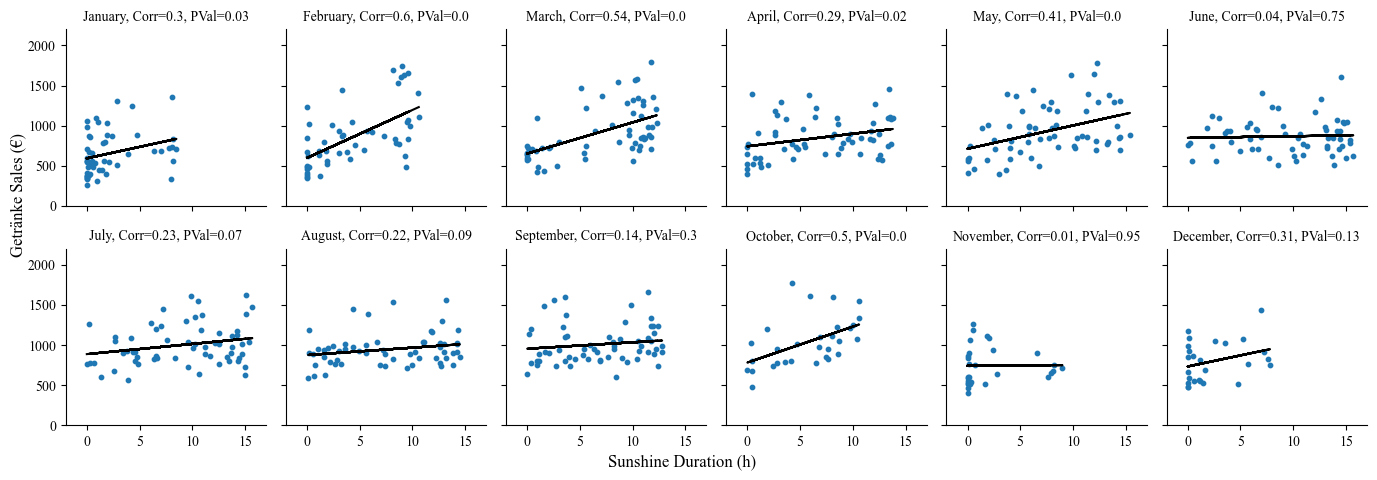

In [11]:
weather_variable = "sunshine_duration"

sales_variable = "Coffee_sales"
# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(14, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Sunshine Duration (h)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-2, 17)
    axes[j,i].set_xticks(np.arange(0, 20, 5))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()


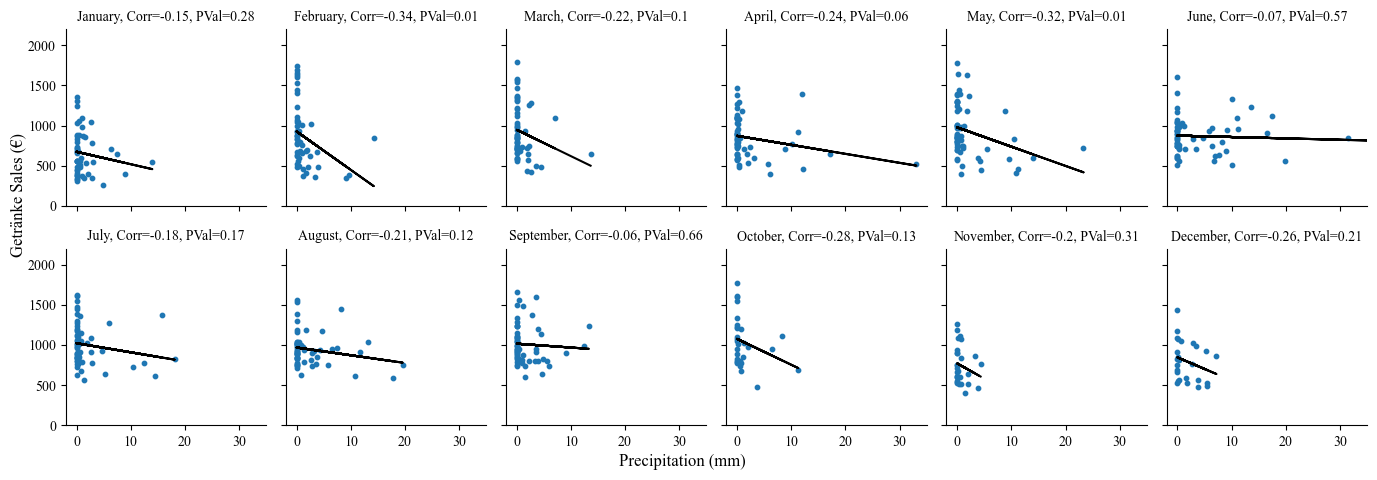

In [12]:
weather_variable = "precipitation"

sales_variable = "Coffee_sales"
# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(14, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Precipitation (mm)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-2, 35)
    axes[j,i].set_xticks(np.arange(0, 40, 10))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

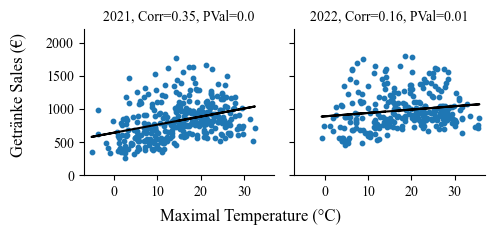

In [13]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

# Plot the correlation between the max temperature and the sales for each year
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5), sharey=True, sharex=True, frameon=True)
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08)
for i, year in enumerate(df["year"].unique()):
    plot_correlation(df, weather_variable, sales_variable, "year", year, axes[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30, 4))

# add a vline where the day of the week is Saturday
#ax.vlines(df[df["day_of_week"] == "Saturday"]["date"].astype("datetime64"), 0, 2000, colors='lightgrey')
# add the lineplot for the sun hours
#ax.plot(df["date"].astype("datetime64"), df["sunshine_duration"].astype("float")*8, color="green")
# add the lineplot for the temperature
ax.plot(df["date"].astype("datetime64"), df["temperature_max"].astype("float"), color="red") 

ax.plot(df["date"].astype("datetime64"), df["Getränke_sales"].astype("float"))
ax.legend(["Getränke_sales", "Saturday"])

In [ ]:
# print the day where the sales were the highest
print("The day with the highest sales was {}".format(df["date"][df["Getränke_sales"].idxmax()]))
# which weekday was this?
print("This was a {}".format(df["day_of_week"][df["Getränke_sales"].idxmax()]))

In [ ]:
# plot the correlation between sales and precipitation
plt.scatter(df["precipitation"], df["Getränke_sales"])
plt.xlabel("Precipitation")
plt.ylabel("Sales")
X = df["precipitation"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y))) # diffent way to calculate correlation???
plt.show()

In [ ]:
# plot the correlation between sales and sunshine
plt.scatter(df["sunshine_duration"], df["Getränke_sales"])
plt.xlabel("Sunshine Duration")
plt.ylabel("Sales")
X = df["sunshine_duration"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y)))
plt.show()

In [14]:
# calculate the correlation between sales and mean temperature

#corr = df["Getränke_sales"].corr(df["temperature_mean"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_mean"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_mean"])[1]
print("Correlation between sales and mean temperature: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.2f}".format(pval))

#corr = df["Getränke_sales"].corr(df["temperature_min"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_min"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_min"])[1]
print("Correlation between sales and min temperature: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.2f}".format(pval))

#corr = df["Getränke_sales"].corr(df["temperature_max"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_max"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_max"])[1]
print("Correlation between sales and max temperature: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.2f}".format(pval))

# 



Correlation between sales and mean temperature: 0.25. The correlation has a p-value of: 0.00
Correlation between sales and min temperature: 0.17. The correlation has a p-value of: 0.00
Correlation between sales and max temperature: 0.30. The correlation has a p-value of: 0.00
